# Exploratory Data Analysis Starter

## Import packages

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [ ]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [ ]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [ ]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [ ]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [ ]:
print("Rows : ",client_df.shape[0], " And Columns: ",client_df.shape[1]," Of Client Dataset")
print("Rows : ",price_df.shape[0], " And Columns: ",price_df.shape[1]," Of Price Dataset")

Rows :  14606  And Columns:  26  Of Client Dataset
Rows :  193002  And Columns:  8  Of Price Dataset


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [ ]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [ ]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


## Checking the Missing Values of Client and Price Dataset

In [ ]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [ ]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

## Checking the Duplicated Values of Client and Price Dataset

In [ ]:
client_df.duplicated().sum()

0

In [ ]:
price_df.duplicated().sum()

0

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [ ]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

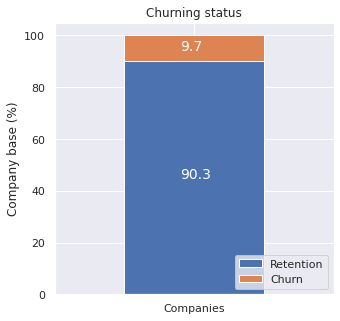

In [ ]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

Insight: Nearly 10% (9.7%) of the customers have churned and 90% of the customers have not churned.

In [ ]:
print(client_df.churn.value_counts())

0    13187
1     1419
Name: churn, dtype: int64


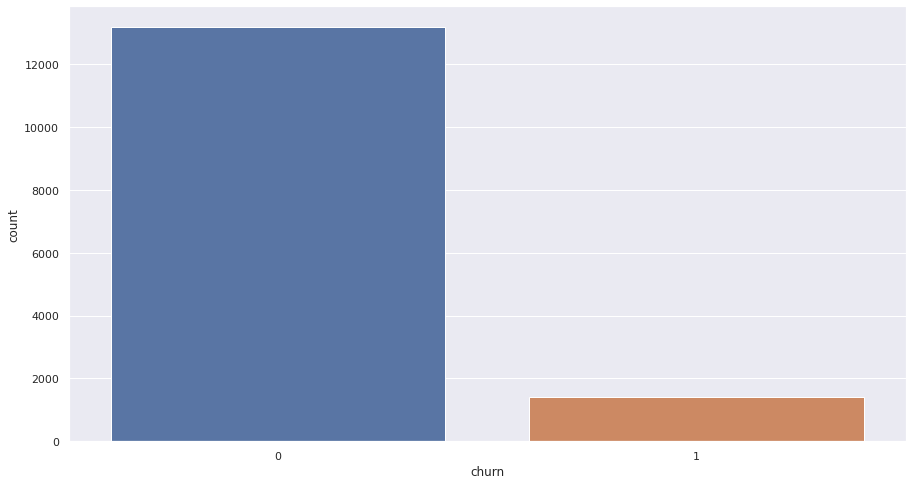

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x=client_df.churn)
plt.show()

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

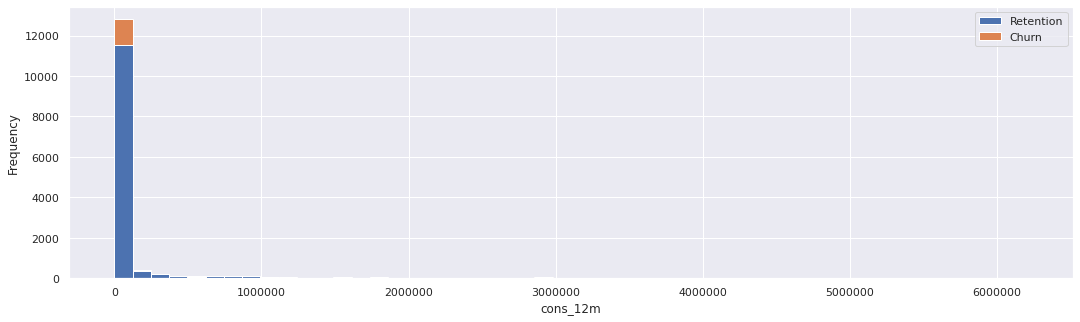

In [ ]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

## Sales 

In [ ]:
sales = client_df[['id', 'channel_sales', 'churn']]
sales = sales.groupby([sales['channel_sales'], sales['churn']])['id'].count().unstack(level=1).fillna(0)
sales_churn = (sales.div(sales.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

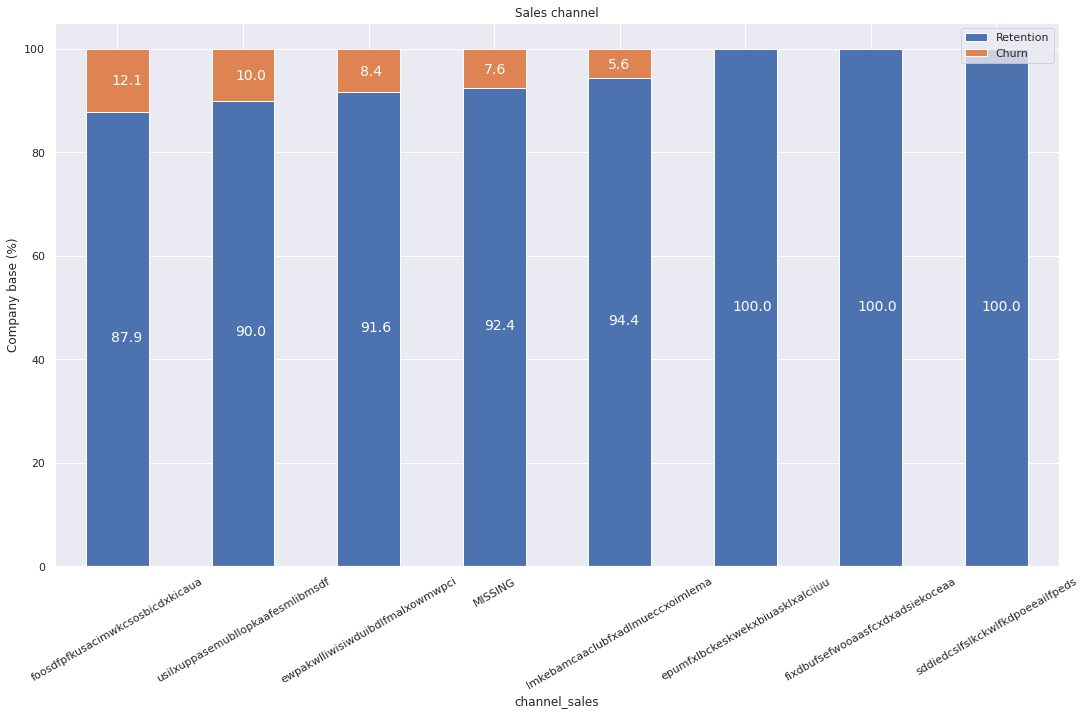

In [ ]:
plot_stacked_bars(sales_churn, 'Sales channel', rot_=30)

Interestingly, the churning customers are distributed over 5 different values for channel_sales. As well as this, the value of `MISSING` has a churn rate of 7 6%. `MISSING` indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes 
to building our model.

# Consumption

Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [ ]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [ ]:
consumption.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,f,0


In [ ]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

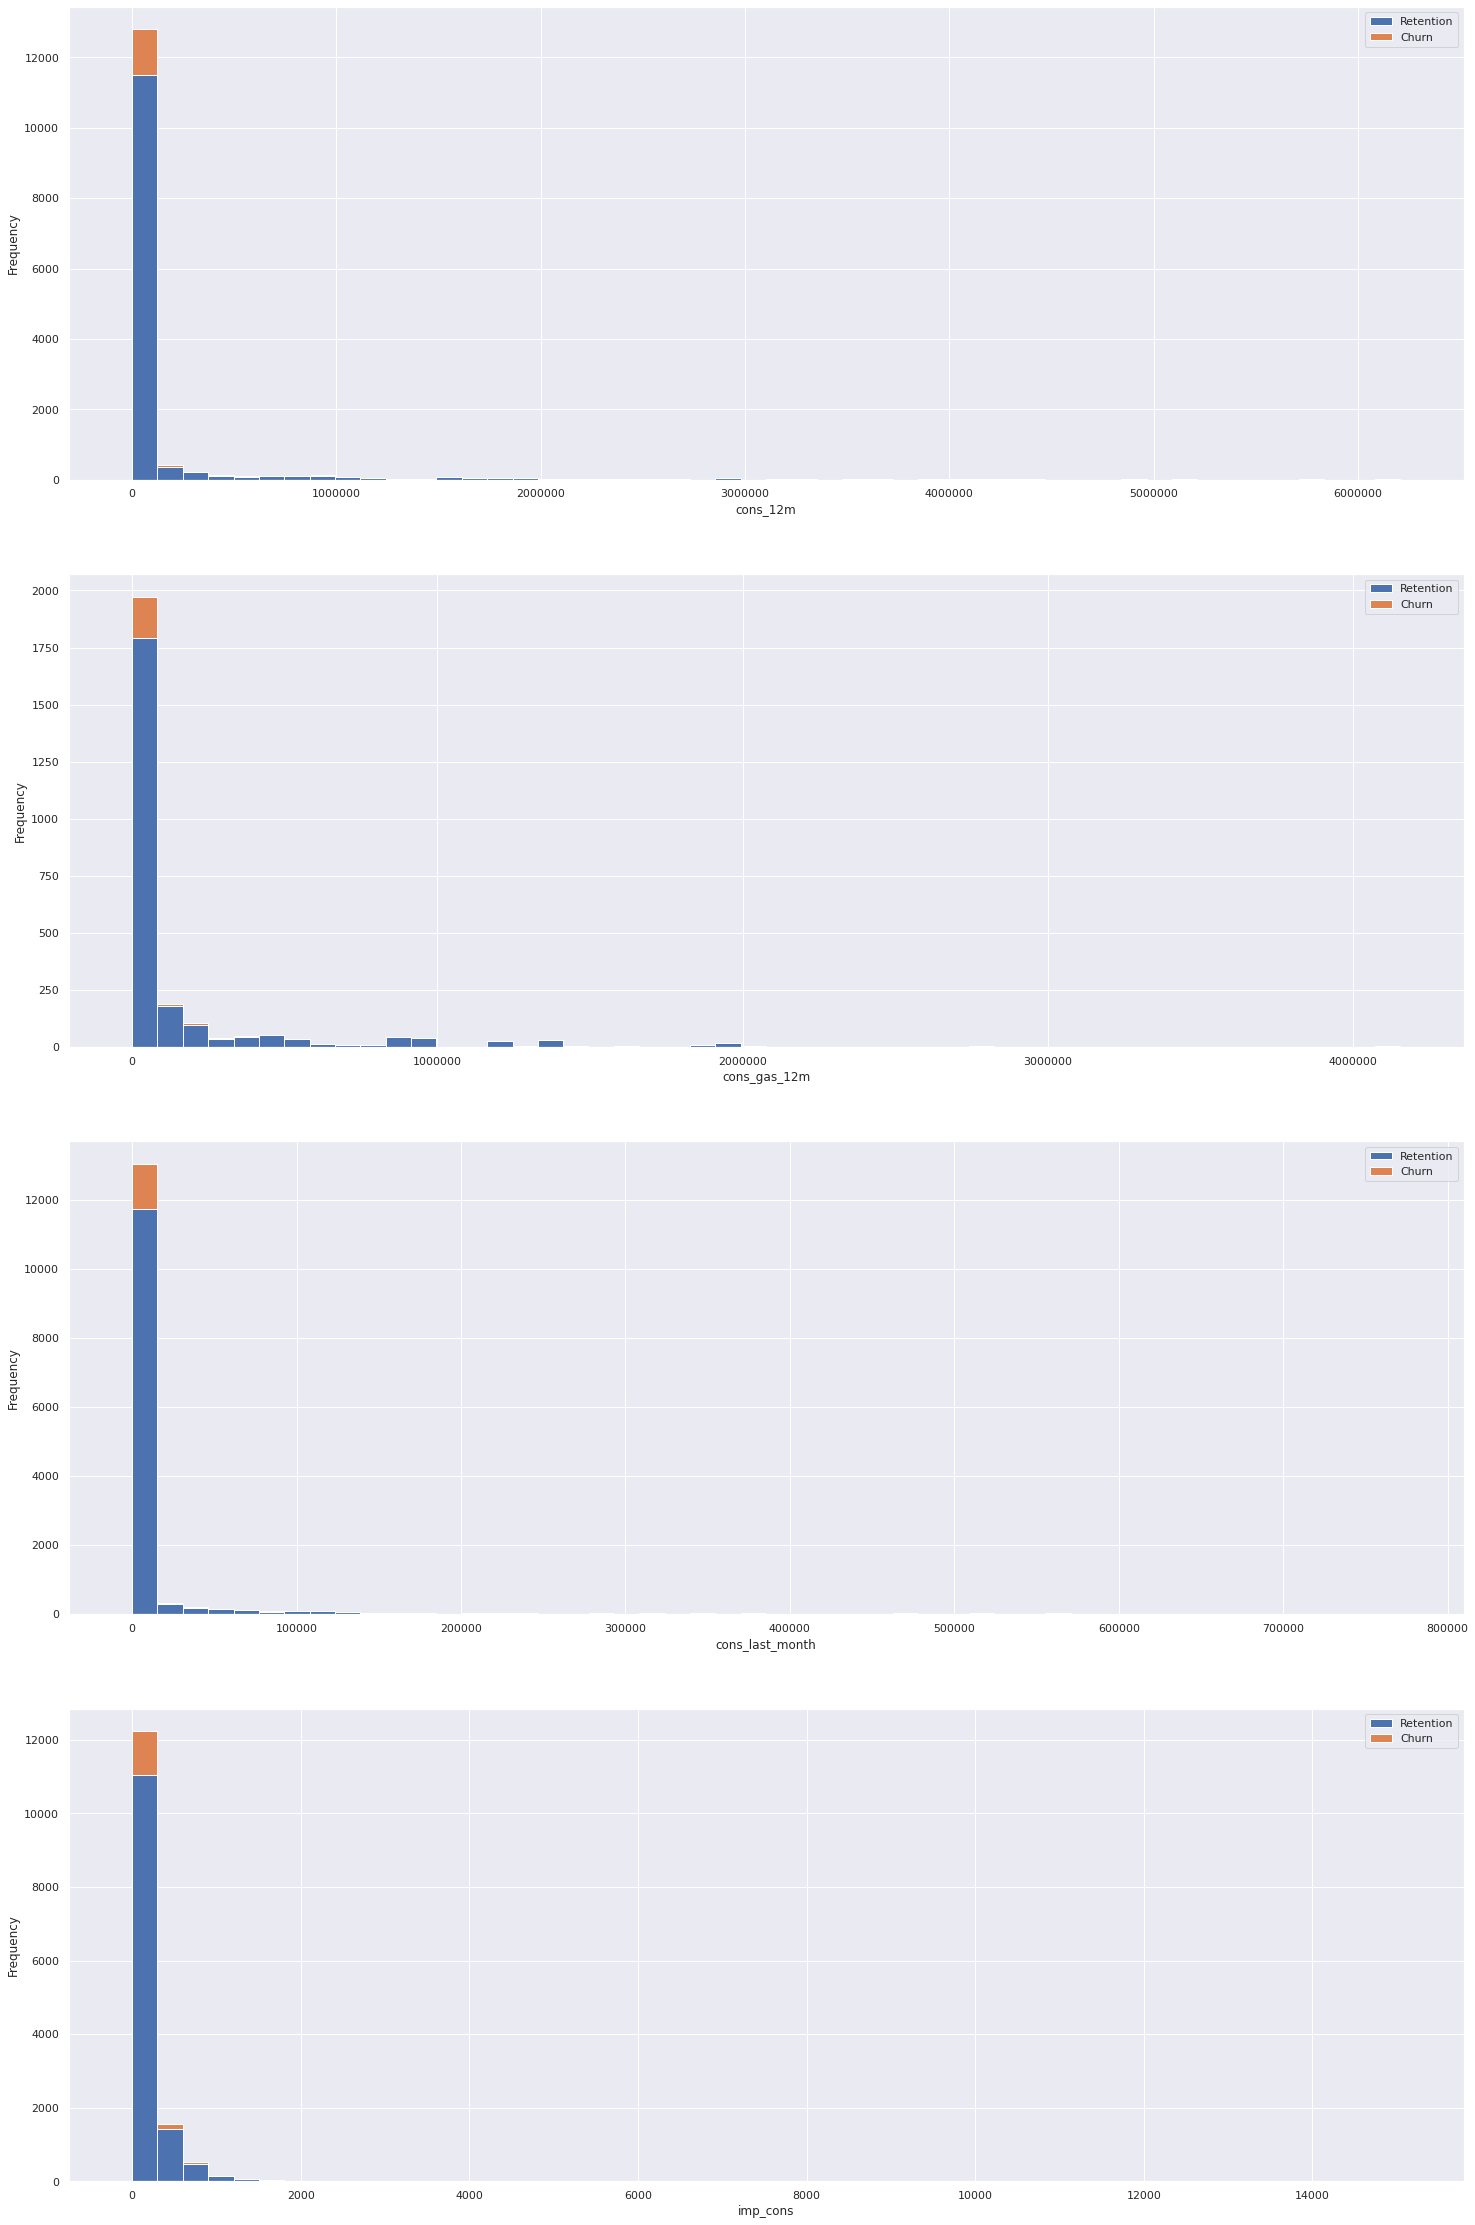

In [ ]:
fig, axs = plt.subplots(nrows=4, figsize=(25, 40))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

plt.savefig("Distribution of the consumption.png", bbox_inches="tight")


The consumption data is clearly significantly positively skewed and has a very long right tail toward the upper values of the distribution. Outliers are most likely to be found in the values at the upper and lower ends of the distribution. To see the outliers more clearly, we might employ a common plot. A boxplot is a common visual representation of the distribution using a five-number summary as the basis:


 - Minimum
 -First Quartile (Q1)
 -Median
 -Third Quartile (Q3)
 -Maximum

It can uncover anomalies and their values. Additionally, it can reveal the degree to which our data is grouped, symmetrical, and skewed.

AttributeError: ignored

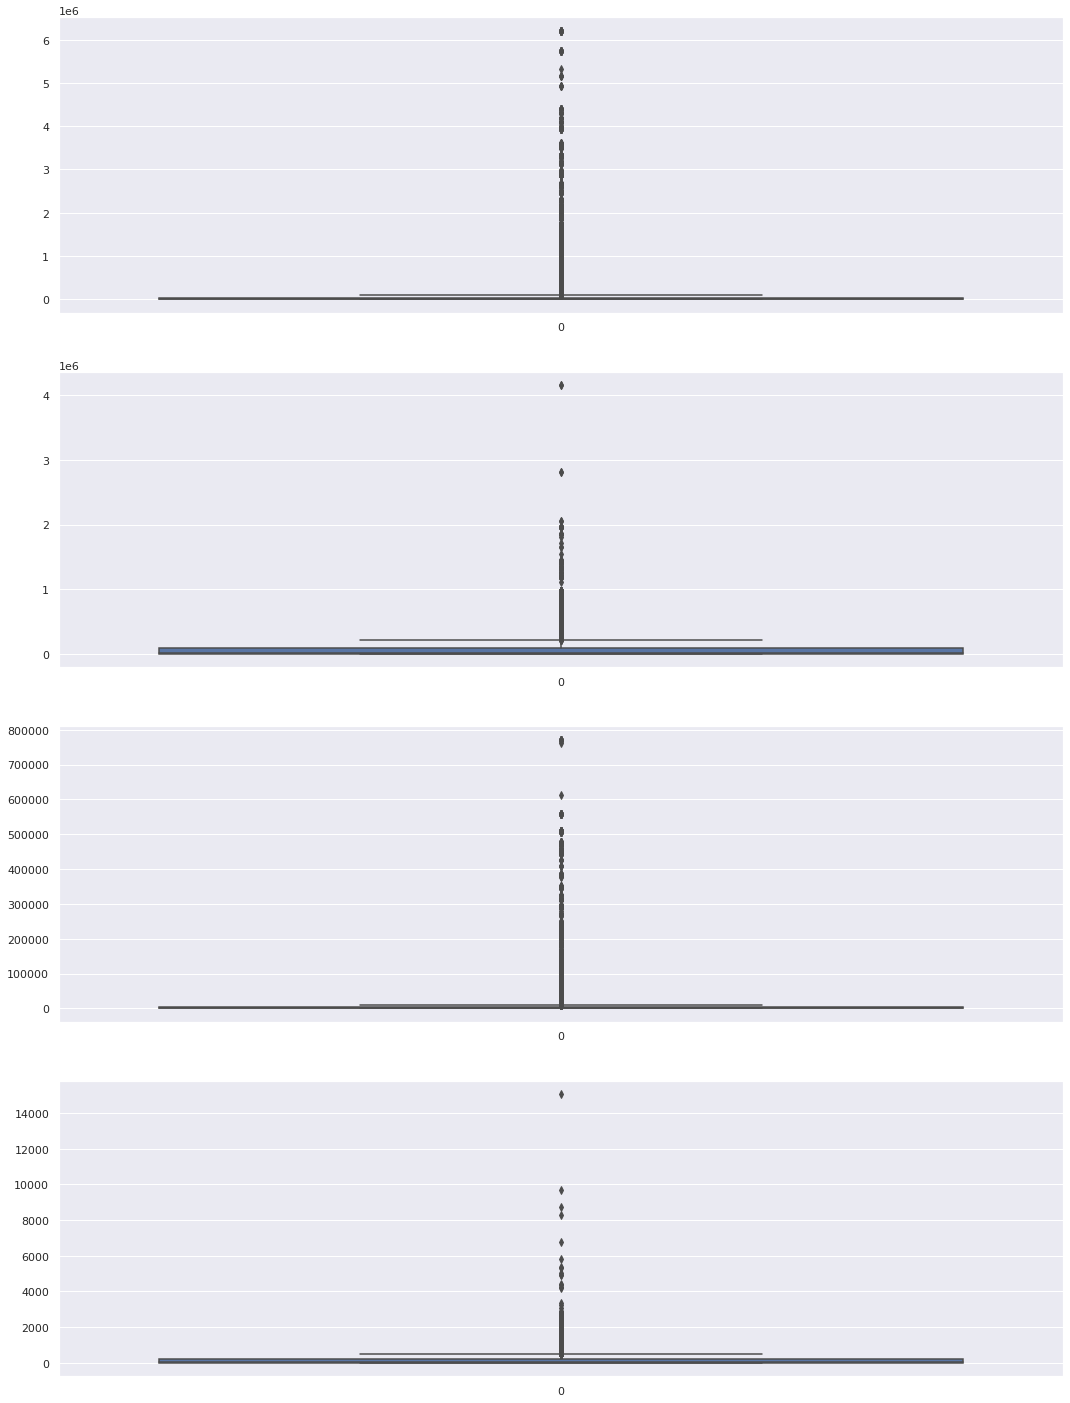

In [ ]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])

# Remove scientific notation
for ax in axs:
  ax.ticker.FuncFormatter(style='plain', axis='x')
  # Set x-axis limit
  axs[0].set_xlim(-200000, 2000000)
  axs[1].set_xlim(-200000, 2000000)
  axs[2].set_xlim(-20000, 100000)
  plt.show()

In the following exercise, feature engineering, we'll address skewness and outliers.

# Forecast

In [ ]:
forecast = client_df[["id", "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak","churn"]]

In [ ]:
forecast.head()

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0
2,764c75f661154dac3a6c254cd082ea7d,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0
3,bba03439a292a1e166f80264c16191cb,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0
4,149d57cf92fc41cf94415803a877cb4b,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0


In [ ]:
forecast.tail()

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
14601,18463073fb097fc0ac5d3e040f356987,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,0
14602,d0a6f71671571ed83b2645d23af6de00,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,0
14605,563dde550fd624d7352f3de77c0cdfcd,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,0


In [ ]:
forecast.sample(10)

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
7416,201532d0a1d7fb006709c5a87a2390b8,146.97,0,0.0,16.70,0.146348,0.000000,46.305378,0
10970,e94ce71d64c1836401399ea09b81a7af,894.08,781,0.0,142.08,0.120372,0.103487,40.606701,0
3634,da91416497cef364e8b4cf76cf844e7f,428.89,0,0.0,16.44,0.153520,0.000000,44.311378,0
352,710145145f365dc43edd8db69a37d88d,2231.52,2070,0.0,128.90,0.116910,0.100572,40.606701,0
11652,07947c64fd16c002f12d6c70ba3e00d4,2027.90,2283,28.0,167.29,0.157877,0.135732,41.105201,0
8338,fbe8b1f935772df88bb1a72b65f93dbc,27618.39,16588,30.0,141.18,0.161936,0.136336,41.105201,0
3406,6441b30fdde9667913c89ccbc7732585,3166.33,3266,0.0,142.22,0.115939,0.100823,40.606701,0
459,22dc23342f14ea066c71cc3778c0a10c,1453.16,0,0.0,0.00,0.160012,0.082114,44.311378,1
7325,251afce546fc19dd41e689384b4c7bb2,4561.79,3309,0.0,0.00,0.116900,0.100015,40.606701,0
4003,5f6d8f57a6135664bea5e66c73df8252,927.09,0,0.0,17.62,0.144902,0.000000,44.311378,0


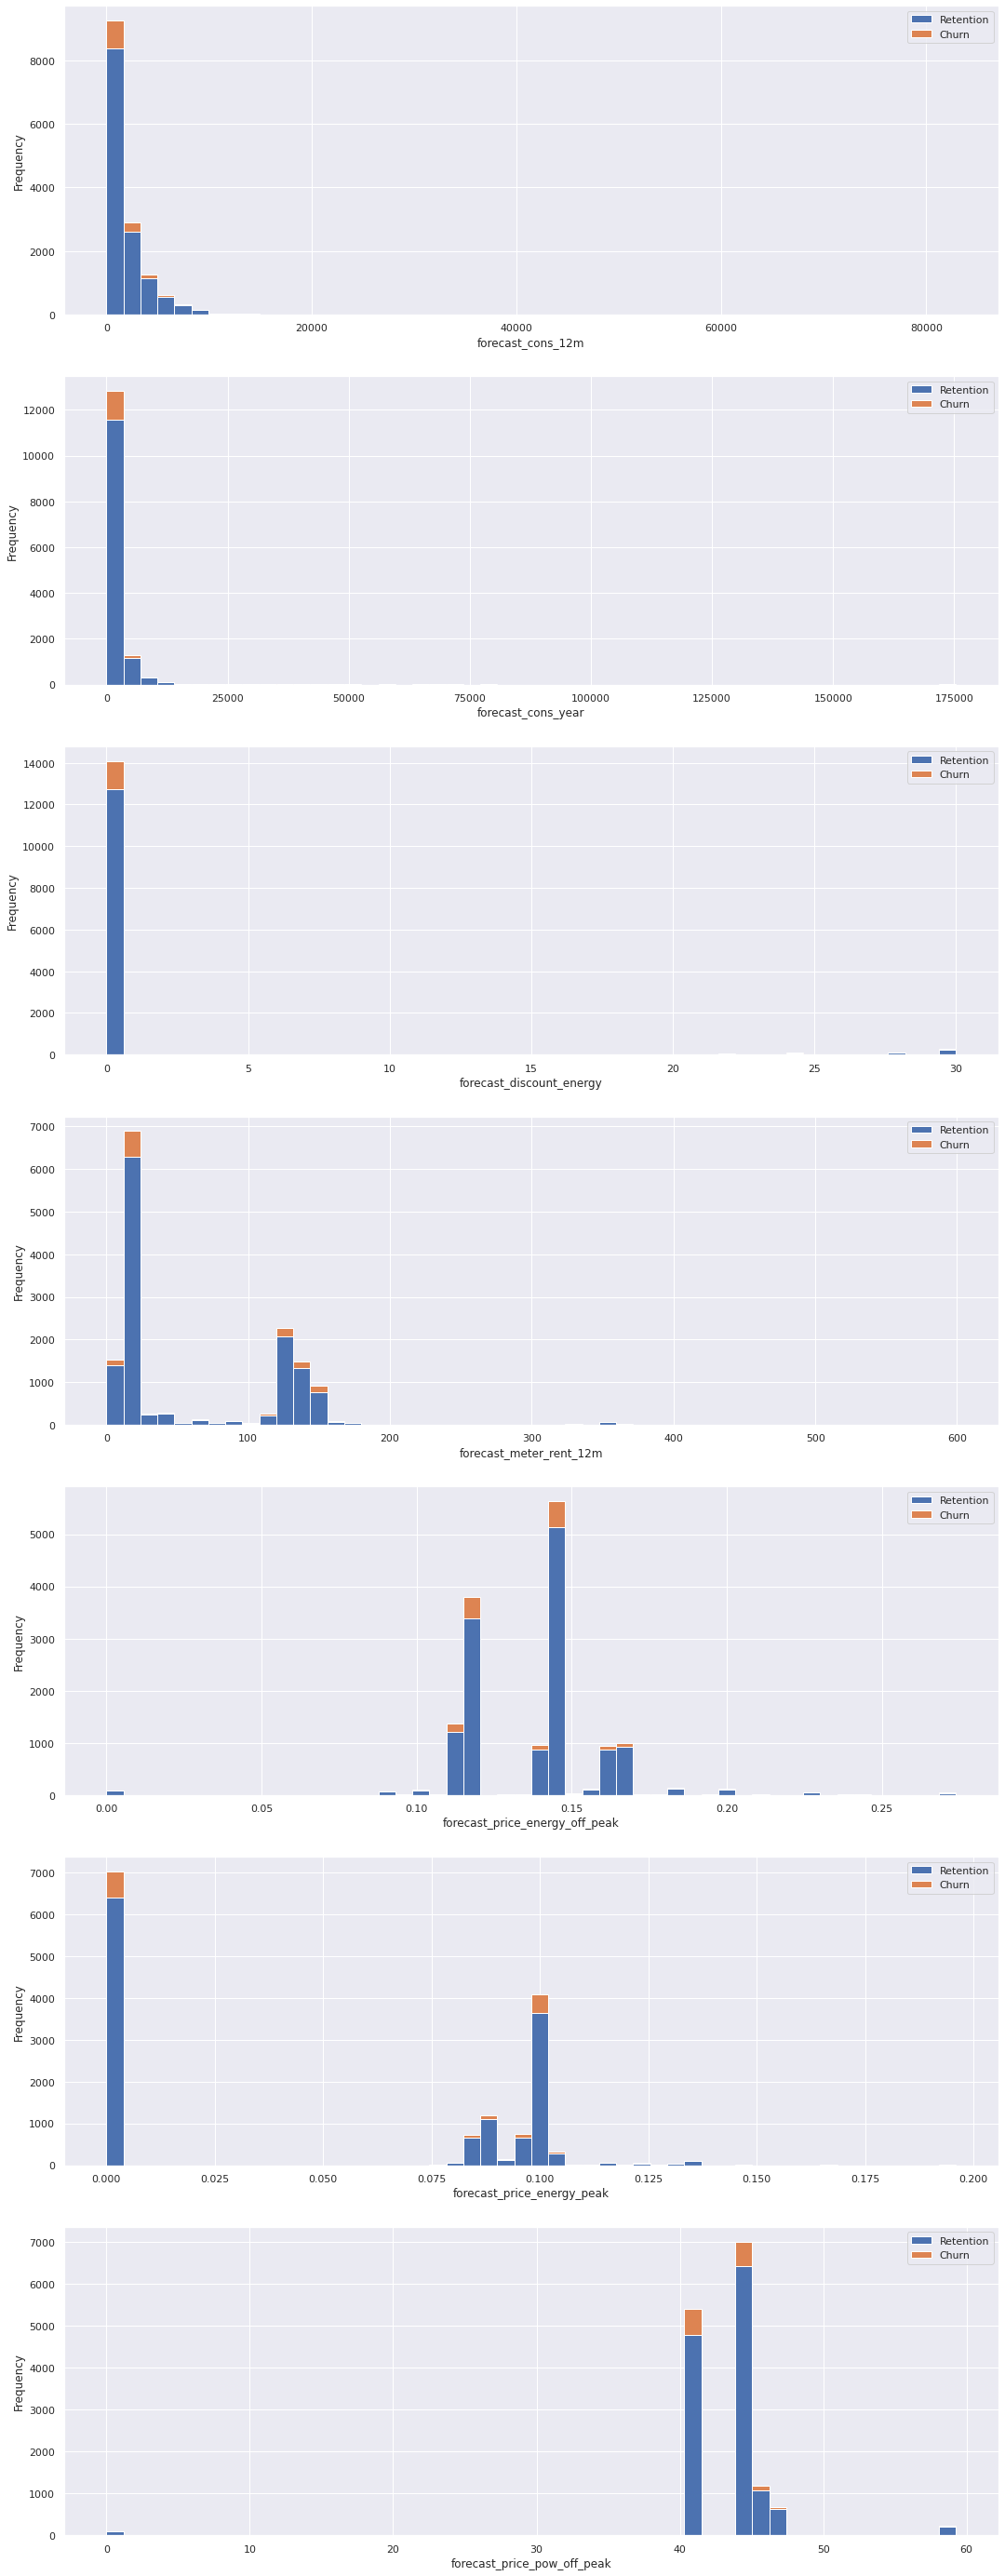

In [ ]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

plt.savefig("View of Forecast.png", bbox_inches="tight")

We can see that several of the variables are significantly positively skewed, giving a very long tail for the higher values, similar to the consumption plots. To account for this skewness, we shall do certain adjustments during the next procedure.

# Contract type

In [ ]:
contract_type = client_df[['id', 'has_gas', 'churn']]

In [ ]:
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

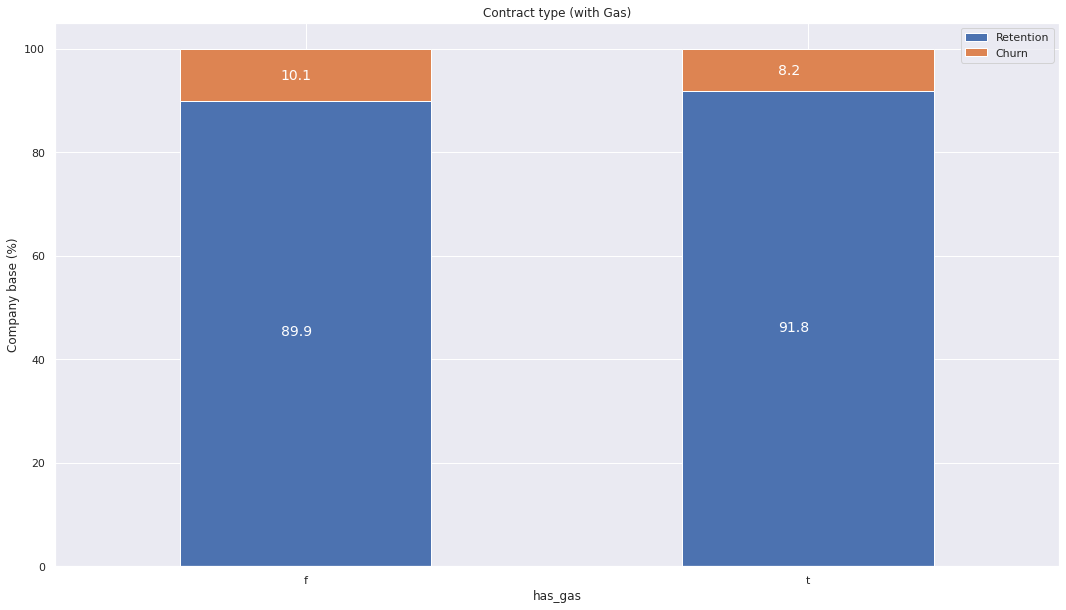

In [ ]:
plot_stacked_bars(contract_percentage, 'Contract type (with Gas)')

# Margins

In [ ]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

AttributeError: ignored

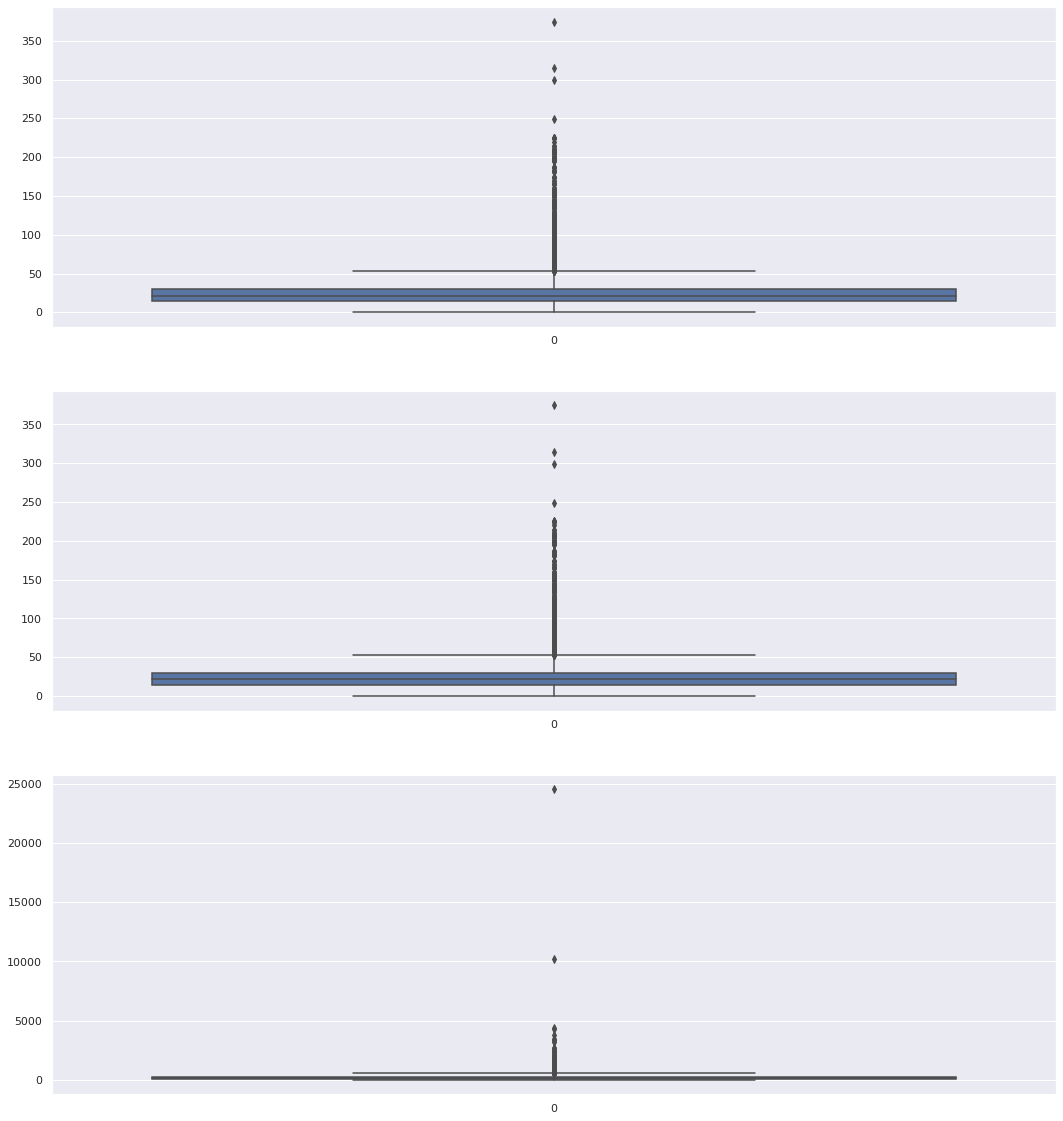

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')

plt.savefig("View of Margins.png", bbox_inches="tight")
plt.show()

We can also notice certain outliers in this data, which we will address in the following activity.

# Subscribed Power

In [ ]:
power = client_df[['id', 'pow_max', 'churn']]

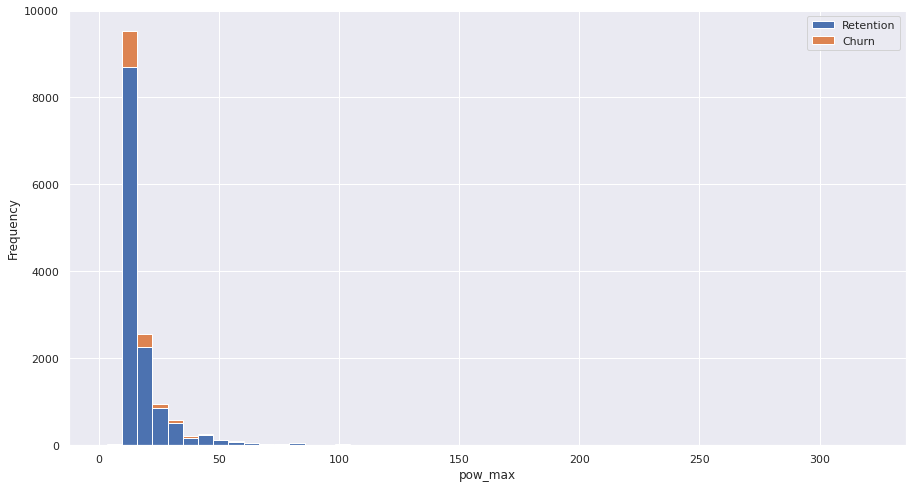

In [ ]:
fig, axs = plt.subplots(nrows=1, figsize=(15,8))
plot_distribution(power, 'pow_max', axs)

plt.savefig("View of Subscribed power.png", bbox_inches="tight")

# Other columns

In [ ]:
other_cols = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]

In [ ]:
products = other_cols.groupby([other_cols["nb_prod_act"], other_cols["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

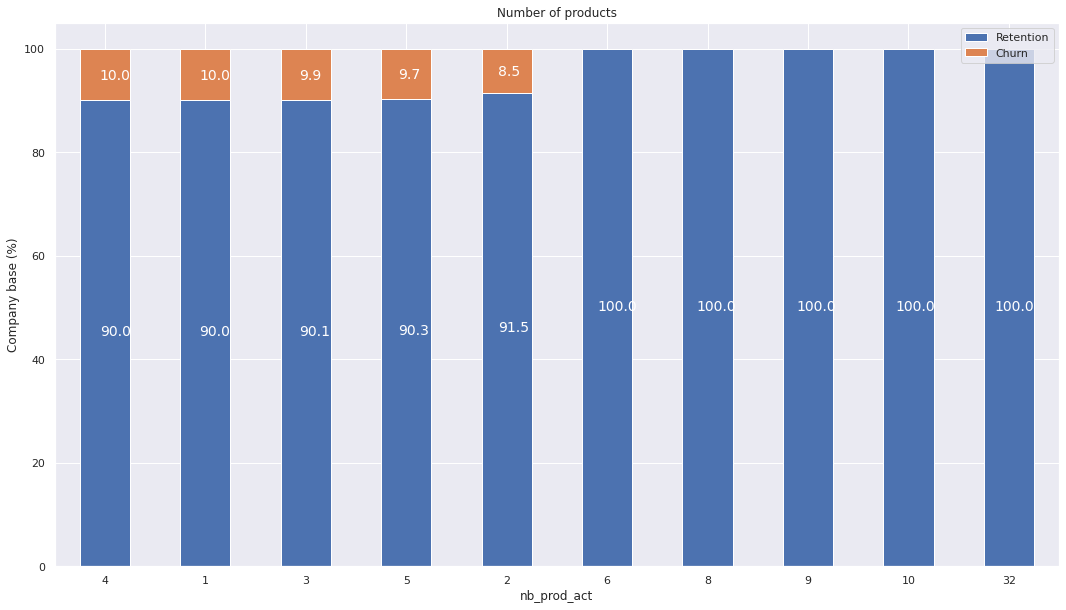

In [ ]:
plot_stacked_bars(products_percentage, "Number of products")

In [ ]:
years_antig = other_cols.groupby([other_cols["num_years_antig"], other_cols["churn"]])["id"].count().unstack(level=1)

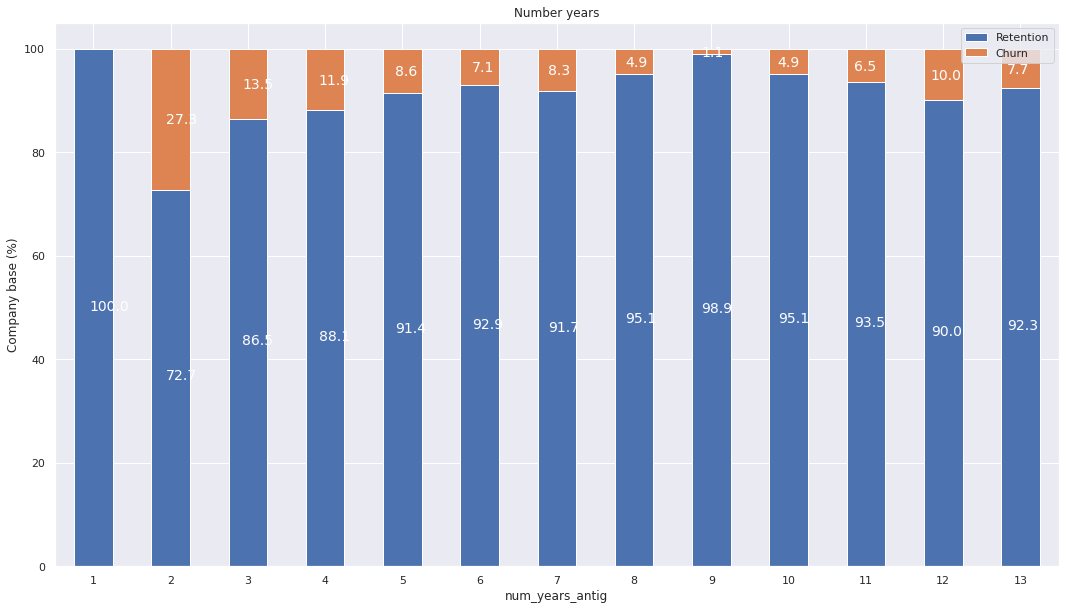

In [ ]:
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

In [ ]:
origin = other_cols.groupby([other_cols["origin_up"], other_cols["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)

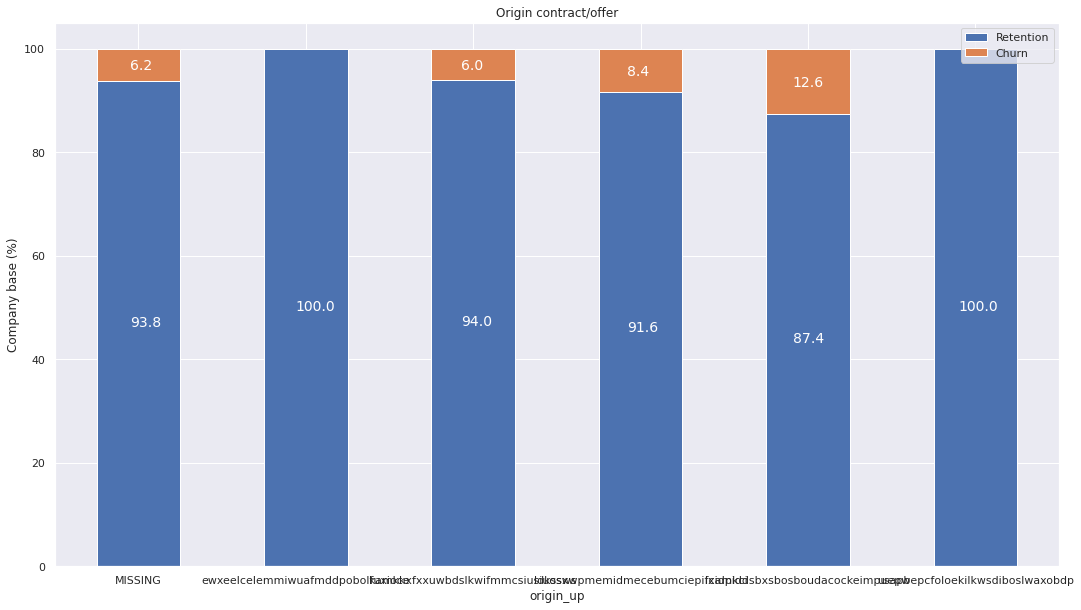

In [ ]:
plot_stacked_bars(origin_percentage, "Origin contract/offer")

# Hypothesis Testing

Since we have investigated the information, now is the ideal time to explore whether cost responsiveness has some effect on stir. First we want to characterize precisely exact thing is cost responsiveness.

Since we have the utilization information for every one of the organizations for the extended period of 2015, we will make new highlights to quantify "price sensitivity" utilizing the normal of the year, the most recent a half year and the most recent 3 months.

In [ ]:
# Transform date columns to datetime type

client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')

In [ ]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [ ]:
# Create mean average data

mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [ ]:
# Comnbine into single dataframe

mean_year = mean_year.rename(index=str, columns={"price_off_peak_var": "mean_year_price_off_peak_var", 
                                                 "price_peak_var": "mean_year_price_peak_var", 
                                                 "price_mid_peak_var": "mean_year_price_mid_peak_var", 
                                                 "price_off_peak_fix": "mean_year_price_off_peak_fix", 
                                                 "price_peak_fix": "mean_year_price_peak_fix", 
                                                 "price_mid_peak_fix": "mean_year_price_mid_peak_fix"})

In [ ]:
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_mid_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [ ]:
mean_6m = mean_6m.rename(index=str, columns={"price_off_peak_var": "mean_6m_price_off_peak_var", 
                                             "price_peak_var": "mean_6m_price_peak_var", 
                                             "price_mid_peak_var": "mean_6m_price_mid_peak_var", 
                                             "price_off_peak_fix": "mean_6m_price_off_peak_fix", 
                                             "price_peak_fix": "mean_6m_price_peak_fix", 
                                             "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"})

In [ ]:
mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_mid_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]

In [ ]:
mean_3m = mean_3m.rename(index=str, columns={"price_off_peak_var": "mean_3m_price_off_peak_var", 
                                             "price_peak_var": "mean_3m_price_peak_var", 
                                             "price_mid_peak_var": "mean_3m_price_mid_peak_var", 
                                             "price_off_peak_fix": "mean_3m_price_off_peak_fix", 
                                             "price_peak_fix": "mean_3m_price_peak_fix", 
                                             "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"})

In [ ]:
mean_3m["mean_3m_price_off_peak"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_peak"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_mid_peak"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]

In [ ]:
# Merge into 1 dataframe

price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [ ]:
price_features.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


In [ ]:
price_features.tail()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
16090,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752,0.113848,0.095499,0.068838,40.728885,24.437330,16.291555,0.112488,0.094804,0.068829,40.728885,24.43733,16.291555,40.841373,24.532134,16.360384
16091,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000,44.589757,0.000000,0.000000
16092,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555,0.151399,0.126871,0.091394,41.228885,24.93733,16.791555,41.380284,25.064201,16.882949
16093,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555,40.847060,24.537821,16.366071
16094,ffff7fa066f1fb305ae285bb03bf325a,0.125360,0.104895,0.075635,40.647427,24.388455,16.258971,40.772788,24.493350,16.334606,0.121276,0.102927,0.076266,40.728885,24.437330,16.291555,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,40.848801,24.539562,16.367812


In [ ]:
price_features.sample(10)

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
1024,0fa9a2d72ee47f5bf3c203c13397869d,0.163101,0.083168,0.000000,44.385450,0.000000,0.000000,44.548552,0.083168,0.000000,0.162764,0.082730,0.000000,44.444710,0.000000,0.000000,0.161993,0.082605,0.000000,44.444710,0.000000,0.000000,44.606703,0.082605,0.000000
13655,d913b3209e4c8eab15a45a9419de5e0b,0.125681,0.105208,0.074831,40.565971,24.339579,16.226385,40.691652,24.444787,16.301216,0.122499,0.103689,0.075176,40.565973,24.339578,16.226383,0.121139,0.102994,0.075167,40.565973,24.339578,16.226383,40.687112,24.442572,16.301550
4229,4162a5243c67678f4a12d1c43e5ec6d7,0.267526,0.007124,0.000000,58.080820,0.000000,0.000000,58.348347,0.007124,0.000000,0.255281,0.014247,0.000000,56.915080,0.000000,0.000000,0.211135,0.042742,0.000000,51.855820,0.000000,0.000000,52.066955,0.042742,0.000000
4228,415e1ccd80890d57ef74d877c8d219e5,0.148501,0.000000,0.000000,44.444710,0.000000,0.000000,44.593211,0.000000,0.000000,0.146486,0.000000,0.000000,44.444710,0.000000,0.000000,0.145162,0.000000,0.000000,44.444710,0.000000,0.000000,44.589872,0.000000,0.000000
4601,477d30e4555d0d9b14bb83ec7dfa3dda,0.148197,0.000000,0.000000,44.266930,0.000000,0.000000,44.415128,0.000000,0.000000,0.145416,0.000000,0.000000,44.266930,0.000000,0.000000,0.143136,0.000000,0.000000,44.266930,0.000000,0.000000,44.410066,0.000000,0.000000
3187,316a9e8135448f0988ea82a1ce49e789,0.121306,0.100690,0.071136,40.620275,24.372163,16.248109,40.741581,24.472853,16.319245,0.117792,0.099140,0.071891,40.674581,24.404746,16.269831,0.116318,0.098633,0.072659,40.728885,24.437330,16.291555,40.845203,24.535963,16.364214
10805,ac9268d5193ab00bd6a1fb73634a5178,0.150758,0.000000,0.000000,44.266930,0.000000,0.000000,44.417688,0.000000,0.000000,0.148727,0.000000,0.000000,44.266930,0.000000,0.000000,0.147983,0.000000,0.000000,44.266930,0.000000,0.000000,44.414913,0.000000,0.000000
2397,24a327533acd17d828619edb219c1c5c,0.123351,0.102815,0.072042,40.688156,24.412893,16.275263,40.811507,24.515708,16.347306,0.120105,0.101207,0.072567,40.728885,24.437330,16.291555,0.118745,0.100512,0.072558,40.728885,24.437330,16.291555,40.847630,24.537842,16.364113
9728,9b672c2044ea9f2e359772e64ce14677,0.149721,0.000000,0.000000,44.266930,0.000000,0.000000,44.416651,0.000000,0.000000,0.146997,0.000000,0.000000,44.266930,0.000000,0.000000,0.144524,0.000000,0.000000,44.266930,0.000000,0.000000,44.411454,0.000000,0.000000
71,00db6c024b1f3440d48d0576204b57f0,0.148612,0.000000,0.000000,44.311375,0.000000,0.000000,44.459987,0.000000,0.000000,0.147012,0.000000,0.000000,44.355820,0.000000,0.000000,0.146788,0.000000,0.000000,44.444710,0.000000,0.000000,44.591498,0.000000,0.000000


Now lets merge in the churn data and see whether price sensitivity has any correlation with churn

In [ ]:
price_analysis = pd.merge(price_features, client_df[['id', 'churn']], on='id')

In [ ]:
price_analysis.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,0.123007,0.104108,0.075469,40.728885,24.43733,16.291555,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


In [ ]:
price_analysis.tail()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
14600,ffebf6a979dd0b17a41076df1057e733,0.122426,0.102375,0.072210,40.606699,24.364017,16.242678,40.729125,24.466392,16.314889,0.118442,0.100477,0.072089,40.647429,24.388454,16.258969,0.115916,0.099461,0.071884,40.728885,24.43733,16.291555,40.844801,24.536791,16.363439,0
14601,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000,44.589757,0.000000,0.000000,0
14602,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555,0.151399,0.126871,0.091394,41.228885,24.93733,16.791555,41.380284,25.064201,16.882949,0
14603,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555,40.847060,24.537821,16.366071,0
14604,ffff7fa066f1fb305ae285bb03bf325a,0.125360,0.104895,0.075635,40.647427,24.388455,16.258971,40.772788,24.493350,16.334606,0.121276,0.102927,0.076266,40.728885,24.437330,16.291555,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,40.848801,24.539562,16.367812,0


In [ ]:
price_analysis.sample(10)

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
12732,def0c0a8e7aab2952a7eaad631f536fd,0.149739,0.000000,0.000000,44.326190,0.000000,0.000000,44.475930,0.000000,0.000000,0.148112,0.000000,0.000000,44.385450,0.000000,0.000000,0.147600,0.000000,0.000000,44.444710,0.00000,0.000000,44.592310,0.000000,0.000000,0
8503,95c09e52d226c0f28d925b1eee06d502,0.149984,0.000000,0.000000,44.385450,0.000000,0.000000,44.535435,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.00000,0.000000,44.593296,0.000000,0.000000,0
8502,95bedb2df268001cc64f259afccf2018,0.167540,0.085745,0.000000,44.341005,0.000000,0.000000,44.508546,0.085745,0.000000,0.166896,0.087277,0.000000,44.415080,0.000000,0.000000,0.166638,0.087890,0.000000,44.444710,0.00000,0.000000,44.611348,0.087890,0.000000,0
1222,1506a39cb97152b1a38c62224f435bc5,0.169522,0.087858,0.000000,44.552117,0.000000,0.000000,44.721639,0.087858,0.000000,0.168228,0.087943,0.000000,44.778043,0.000000,0.000000,0.169094,0.088956,0.000000,45.444710,0.00000,0.000000,45.613804,0.088956,0.000000,0
3028,341db71aa50f707eae947b1e1a06c022,0.168914,0.086935,0.000000,44.400265,0.000000,0.000000,44.569179,0.086935,0.000000,0.167407,0.087374,0.000000,44.444710,0.000000,0.000000,0.166636,0.087248,0.000000,44.444710,0.00000,0.000000,44.611346,0.087248,0.000000,0
246,048daafff0ece9e44905f310b08326b5,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.00000,0.000000,44.593296,0.000000,0.000000,0
10398,b72f887a57e9e67b325bc958e0d5ff9d,0.149056,0.000000,0.000000,44.266930,0.000000,0.000000,44.415986,0.000000,0.000000,0.146476,0.000000,0.000000,44.266930,0.000000,0.000000,0.144292,0.000000,0.000000,44.266930,0.00000,0.000000,44.411222,0.000000,0.000000,0
2427,2982f0a2e7aefc1e47b9d6f0859d936e,0.122726,0.102185,0.072778,40.633851,24.380309,16.253540,40.756577,24.482494,16.326318,0.119475,0.100975,0.074019,40.701733,24.421038,16.280693,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555,40.847060,24.537821,16.366071,0
4178,47f4a5810a1333f463ad7b5ecd43be5e,0.125246,0.104856,0.075744,40.661003,24.396601,16.264402,40.786250,24.501458,16.340146,0.121276,0.102927,0.076266,40.728885,24.437330,16.291555,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,40.848801,24.539562,16.367812,0
4808,53d9246a0caf15ffe89b34609b9af8d8,0.151189,0.000000,0.000000,44.444710,0.000000,0.000000,44.595899,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.00000,0.000000,44.593296,0.000000,0.000000,0


# Checking Correlation

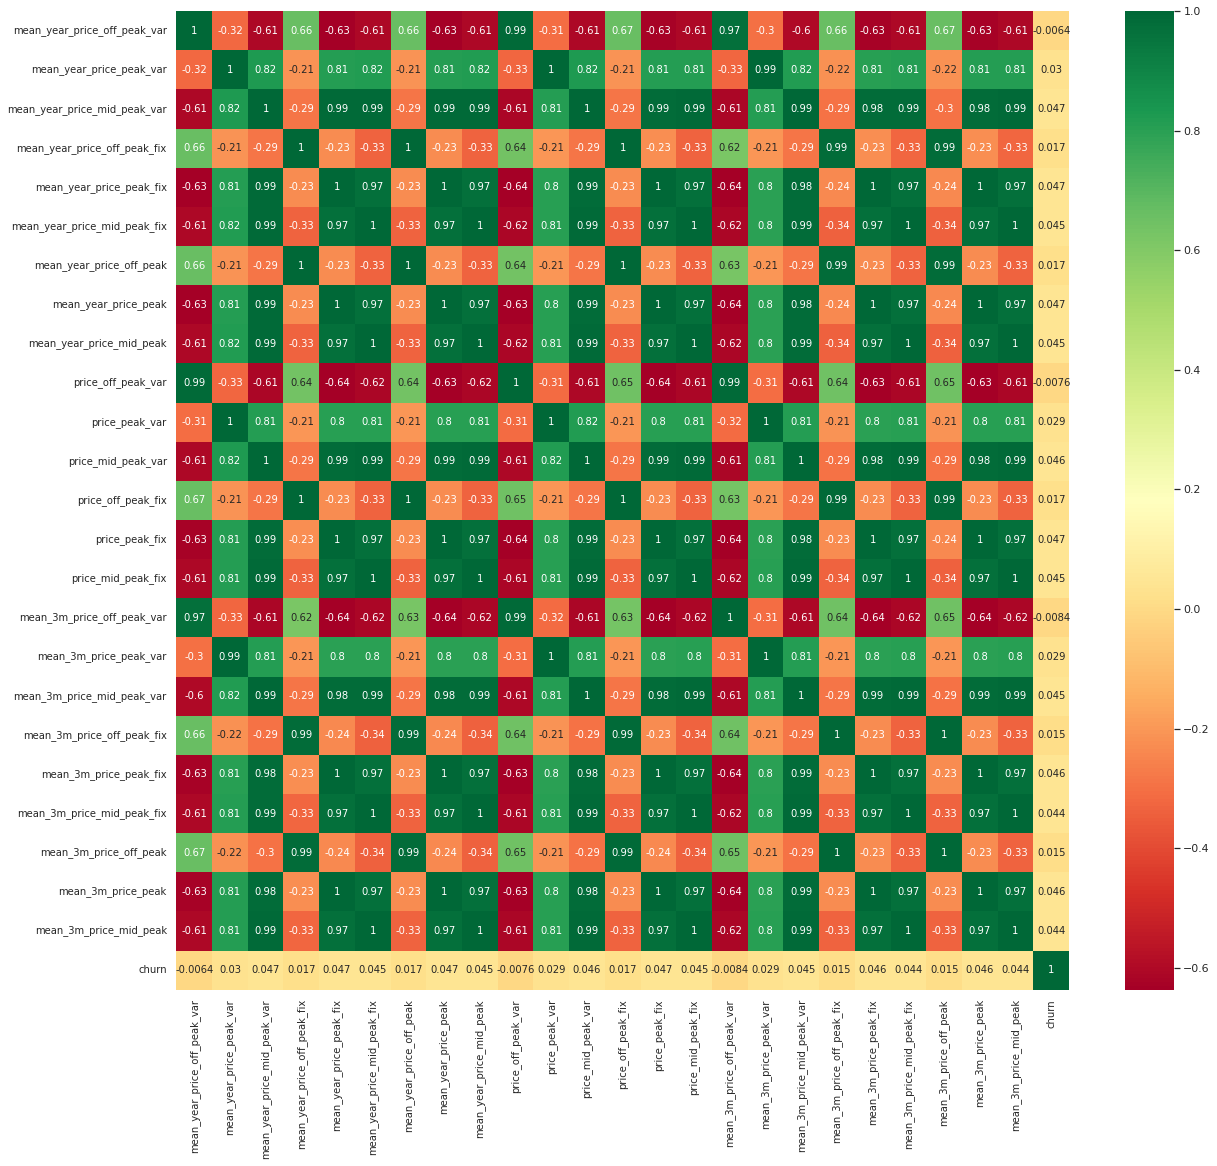

In [ ]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot = True, cmap='RdYlGn', annot_kws={'size':10})

# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("View of Correlation.png", bbox_inches="tight")
plt.show()

Although the association with churn is generally quite modest, the correlation plot reveals a higher degree of correlation with other price sensitivity variables. This suggests that price sensitivity and churn have a shaky linear relationship. This shows that we might need to develop the feature differently if we want price sensivity to be a significant factor in predicting churn.

In [ ]:
merged_data = pd.merge(client_df.drop(columns=['churn']), price_analysis, on='id')

In [ ]:
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,40.812330,24.516531,16.348129,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [ ]:
merged_data.tail()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
14600,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,44.514760,0.000000,0.000000,0.140916,0.000000,0.000000,44.444710,0.000000,0.000000,0.140172,0.000000,0.000000,44.444710,0.000000,0.000000,44.584882,0.000000,0.000000,0
14601,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418,59.122473,36.488785,8.416235,0.103851,0.093904,0.070903,59.094572,36.442033,8.356575,0.102352,0.093181,0.070990,59.173468,36.490689,8.367731,59.275820,36.583870,8.438721,1
14602,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,1
14603,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
14604,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0.168662,0.087344,0.000000,44.266930,0.000000,0.000000,44.435592,0.087344,0.000000,0.166733,0.087030,0.000000,44.266930,0.000000,0.000000,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,44.432892,0.086905,0.000000,0


In [ ]:
merged_data.sample(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
9365,74cca67880ee339eff25907d457ae3c9,ewpakwlliwisiwduibdlfmalxowmwpci,11142,0,706,2011-02-21,2016-02-21,2011-02-21,2015-02-23,1168.27,706,0.0,132.14,0.116900,0.100015,40.606701,f,70.71,39.60,39.60,1,129.01,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0
4166,8f9d6efc1ac84dab593449c74c9fd94c,foosdfpfkusacimwkcsosbicdxkicaua,4050,0,0,2011-07-05,2016-07-05,2015-05-23,2015-07-09,601.74,0,0.0,19.28,0.142822,0.000000,44.311378,f,0.00,18.62,18.62,1,54.62,5,lxidpiddsbxsbosboudacockeimpuepw,13.200,0.147622,0.000000,0.000000,44.341005,0.000000,0.000000,44.488627,0.000000,0.000000,0.145326,0.000000,0.000000,44.415080,0.000000,0.000000,0.144698,0.000000,0.000000,44.444710,0.000000,0.000000,44.589408,0.000000,0.000000,0
10653,2ec804a9b775bd54448086cd4a528c03,lmkebamcaaclubfxadlmueccxoimlema,309803,0,33159,2010-09-21,2016-09-21,2010-09-21,2015-09-25,581.00,0,0.0,18.61,0.144902,0.000000,44.311378,f,0.00,12.82,12.82,1,50.98,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.148612,0.000000,0.000000,44.311375,0.000000,0.000000,44.459987,0.000000,0.000000,0.147012,0.000000,0.000000,44.355820,0.000000,0.000000,0.146788,0.000000,0.000000,44.444710,0.000000,0.000000,44.591498,0.000000,0.000000,0
5628,98a48424d6bd1913249c77c1b3de0d0a,MISSING,19693,0,3619,2009-12-10,2016-12-10,2015-10-30,2015-12-11,2905.72,3619,0.0,0.00,0.144058,0.000000,44.311378,f,524.46,3.40,3.40,1,236.45,6,lxidpiddsbxsbosboudacockeimpuepw,12.500,0.147632,0.007124,0.000000,44.266930,0.000000,0.000000,44.414562,0.007124,0.000000,0.145709,0.014247,0.000000,44.266930,0.000000,0.000000,0.144524,0.000000,0.000000,44.266930,0.000000,0.000000,44.411454,0.000000,0.000000,0
11771,28af5235afcbcb24f42d4651d9229a2a,foosdfpfkusacimwkcsosbicdxkicaua,3037,10766,539,2011-03-10,2016-03-10,2011-03-10,2015-03-11,459.12,539,0.0,18.52,0.146694,0.000000,44.311378,t,80.09,34.27,34.27,2,46.25,5,lxidpiddsbxsbosboudacockeimpuepw,15.000,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
5605,76862ed6c9f49c82051dc4c7e42e7348,foosdfpfkusacimwkcsosbicdxkicaua,3995,0,0,2011-02-22,2016-02-22,2015-12-16,2015-02-23,632.88,0,0.0,24.76,0.154332,0.000000,44.311378,f,0.00,33.12,33.12,1,61.16,5,lxidpiddsbxsbosboudacockeimpuepw,13.200,0.158800,0.000000,0.000000,44.266930,0.000000,0.000000,44.425730,0.000000,0.000000,0.158762,0.000000,0.000000,44.266930,0.000000,0.000000,0.157058,0.000000,0.000000,44.266930,0.000000,0.000000,44.423988,0.000000,0.000000,1
12013,69699ab0c42fdb76d84886a0372d1fe7,MISSING,1172,0,68,2010-01-01,2017-01-01,2014-07-17,2016-01-02,126.67,68,0.0,131.05,0.116902,0.100015,40.606701,f,7.07,37.44,37.44,1,13.64,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,15.001,0.124546,0.103983,0.07347

# Saving the dataframe to "clean_eda_data.csv" file

In [ ]:
merged_data.to_csv("clean_eda_data.csv")